In [3]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Vector

Vector는 magnitude와 direction을 갖은 array라고 보면 됩니다.

$$ \textbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ ... \\ x_n \end{bmatrix}  $$

Indexing은 예를 들어서 1, 2, 6번 element를 access 한다면 $ x_1, x_2, x_6 $ 이렇게 표기를 하며 집합으로는 $ \{1, 3, 6 \} $으로 표기합니다. 

In [5]:
# vector x의 {1, 3, 6}을 access하는 방법
x = np.array([0.5, 0.7, 0.9, 1, 2, 4, 8, -0.1, -0.2, -0.3])
x[[1, 3, 6]]

array([ 0.7,  1. ,  8. ])

## Vector Addition

$$ \textbf{a} = \begin{bmatrix} 6 \\ -2 \end{bmatrix},\ \textbf{b} = \begin{bmatrix} -4 \\ 4 \end{bmatrix} $$

$$ \textbf{a} + \textbf{b} = \begin{bmatrix} 2 \\ 2 \end{bmatrix} $$

In [94]:
a = np.array([6, -2])
b = np.array([-4, 4])
a + b

array([2, 2])

[0]: [ 6 -2]
[1]: [2 2]


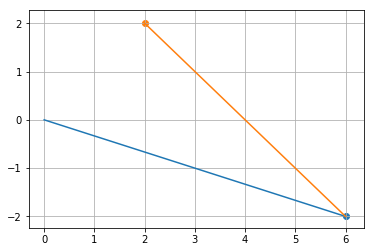

In [88]:
def visualize_add(*points):
    prev_point = [0, 0]
    for i, point in enumerate(points):
        point = np.array(point)
        next_point = prev_point + point
        print(f'[{i}]: {next_point}')
        plot(*np.dstack([prev_point, next_point])[0])
        scatter(*next_point)
        prev_point = next_point
    grid()
    
visualize_add([6, -2], [-4, 4])

[0]: [1 1]
[1]: [2 3]
[2]: [3 7]
[3]: [ 4 15]


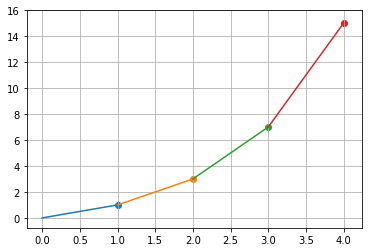

In [93]:
visualize_add([1, 1], [1, 2], [1, 4], [1, 8])

[0]: [-4 -4]
[1]: [-4 -2]
[2]: [-1 -4]


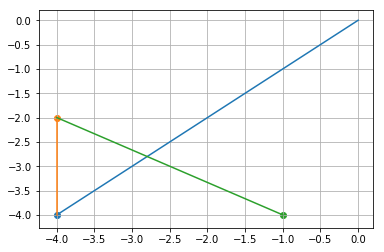

In [90]:
visualize_add([-4, -4], [0, 2], [3, -2])

# Multiplying a vector by a scalar

$$ \textbf{a} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$$

$$ 3 \cdot \textbf{a} = \begin{bmatrix} 6 \\ 3 \end{bmatrix} $$

In [95]:
a = np.array([2, 1])
3 * a

array([6, 3])

[0]: [2 1]
[1]: [6 3]


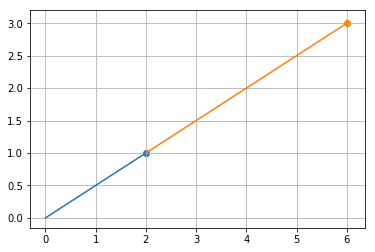

In [105]:
def visualize_multiply_by_scalar(*points):
    prev_point = [0, 0]
    for i, point in enumerate(points):
        point = np.array(point)
        if i == 0:
            next_point = point
        else:
            next_point = prev_point * point
        print(f'[{i}]: {next_point}')
        plot(*np.dstack([prev_point, next_point])[0])
        scatter(*next_point)
        prev_point = next_point
    grid()

visualize_multiply_by_scalar([2, 1], 3)

[0]: [4 1]
[1]: [12  3]


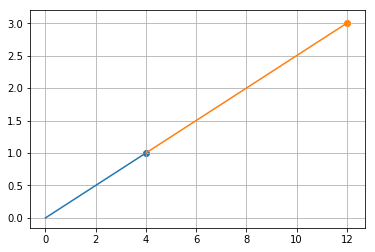

In [106]:
visualize_multiply_by_scalar([4, 1], 3)

[0]: [-1  2]
[1]: [-1.5  3. ]
[2]: [-3.  6.]
[3]: [ -9.  18.]


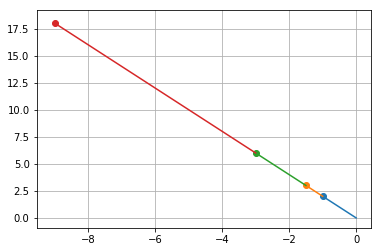

In [121]:
visualize_multiply_by_scalar([-1, 2], 1.5, 2, 3)

# Magnitude 

* [Vector dot product and vector length](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length) 동영상 참고


Vector Length는 magnitude를 구하는 것과 같으며 다음과 같습니다.

$$ \| \textbf{a} \| = \sqrt{ a^2_1 + a^2_2 + ... + a^2_N} $$

예를 들어서 vector $ \begin{bmatrix} 5 \\ 5 \end{bmatrix} $ 는 $ \sqrt{5^2 + 5^2} = \sqrt{50} $

In [154]:
def magnitude(vector):
    return np.sqrt(np.sum(vector**2))

a = np.array([5, 5])

print('Numpy Norm:\t', np.linalg.norm(a))
print('Magnitude: \t', magnitude(a))

Numpy Norm:	 7.07106781187
Magnitude: 	 7.07106781187


# Dot Product

* https://en.wikipedia.org/wiki/Dot_product

dot product는 2 vectors사이의 선을 그려넣을때 나오는 magnitude의 값과도 같습니다. <br>
따라서 Dot Product는 다음의 공식과도 같습니다. 

$$ \| \textbf{a} \| \cdot \| \textbf{b} \| * cos(\theta) $$

$ cos(\theta) $를 사용하는 이유는 magnitude란 hypotenuse와 동일하며,  $ \frac{\text{adjacent}}{\text{hypotenuse}} \cdot \text{hypotenuse} = \text{adjacent}  $ 값이 나오게 됩니다. <br>
즉 adjacent의 값은 다른 vector의 


예제. 

$$ \textbf{a} = \begin{bmatrix} 0 \\ 5 \end{bmatrix},\ \textbf{b} = \begin{bmatrix} 4 \\ 4 \end{bmatrix} $$

$$ \textbf{a} \cdot \textbf{b}  = 16 $$

In [155]:
def dot(a, b):
    return np.linalg.norm(a) * np.linalg.norm(b) * np.cos(np.deg2rad(45))

a = np.array([0, 4])
b = np.array([4, 4])
print('dot product:', a.dot(b))
print('using cosine:', dot(a, b))

dot product: 16
using cosine: 16.0


In [140]:
def magnitude1(vector):
    return np.sqrt(np.sum(vector**2))

def magnitude2(vector):
    return np.sqrt(vector.dot(vector))

print(magnitude(a), np.linalg.norm(a))
print(magnitude(b), np.linalg.norm(b))

print(np.linalg.norm(a), np.sqrt(a.dot(a)))

6.32455532034 6.32455532034
5.65685424949 5.65685424949
6.32455532034 6.32455532034


# Matrix Multiplication

Matrix multiplication은 일종의 geomatrical transformation으로 봐야 합니다.

In [161]:
a = np.array([[1,3], [2, 4]])
b = np.array([0, 1])
print(a.dot(b))
print(b.dot(a))



[3 4]
[2 4]
